True

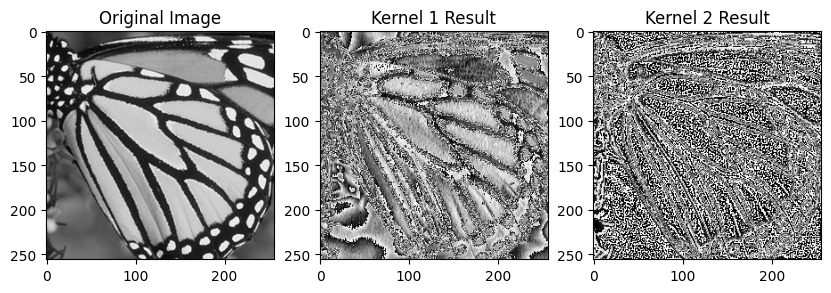

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convolution2d(image, kernel):
    # Get the dimensions of the image and kernel
    kernel_row, kernel_col = kernel.shape
    image_row, image_col = image.shape

    # Create an output array to store the convolved image
    output = np.zeros_like(image)

    # Reflection padding for the image
    pad_height = kernel_row // 2
    pad_width = kernel_col // 2
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')

    # Perform the convolution operation
    for i in range(image_row):
        for j in range(image_col):
            output[i, j] = np.sum(padded_image[i:i+kernel_row, j:j+kernel_col] * kernel)

    # Clip values to be in the valid range for uint8 and convert
    output = np.clip(output, 0, 255).astype(np.uint8)

    return output

# Load the image in grayscale
image = cv2.imread("butterfly.png", cv2.IMREAD_GRAYSCALE)

# Define the kernels
kernel1 = np.array([[-1, 4, -1], [-1, 8, -1], [-1, 4, -1]])
kernel2 = np.array([[-1, 0, -1], [0, 4, 0], [-1, 0, -1]])

#blur kernel test
kernel3 = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

# Apply the convolution to the grayscale image
result1 = convolution2d(image, kernel1)
result2 = convolution2d(image, kernel2)
result3 = convolution2d(image, kernel3)

# Display the images using plt subplots
plt.figure(figsize=(10, 10))
plt.subplot(131)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.title("Kernel 1 Result")
plt.imshow(result1, cmap='gray')
plt.subplot(133)
plt.title("Kernel 2 Result")
plt.imshow(result2, cmap='gray')

# Save the results
cv2.imwrite("result1_grayscale.png", result1)
cv2.imwrite("result2_grayscale.png", result2)